<a href="https://colab.research.google.com/github/DavyL0/credit-analyse/blob/main/mod12_ex02_transformac%CC%A7o%CC%83es_em_X_e_Y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

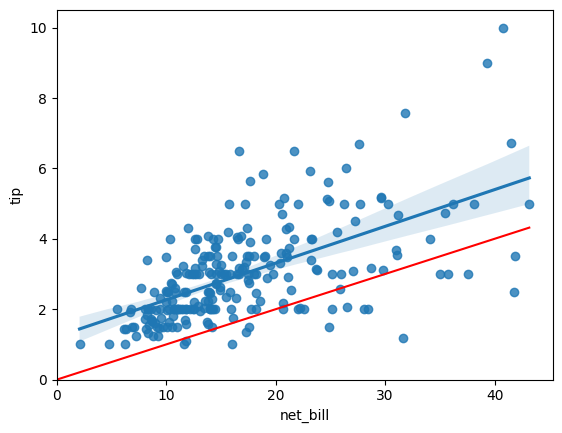

In [3]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [17]:
reg = smf.ols('tip_pct ~ np.log(net_bill+.1)', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     60.24
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           2.35e-13
Time:                        15:07:47   Log-Likelihood:                 123.44
No. Observations:                 244   AIC:                            -242.9
Df Residuals:                     242   BIC:                            -235.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.6204      0.055     11.342      0.000       0.513       0.728
np.log(net_bill + .1)    -0.1538      0.020     -7.762      0.000      -0.193      -0.115
==============================================================================
Omnibus:                      441.700   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173109.880
Skew:                           9.884   Prob(JB):                         0.00
Kurtosis:                     131.982   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [13]:
reg = smf.ols('tip_pct ~ np.polyfit(net_bill)', data = tips).fit()
reg.summary()

PatsyError: Error evaluating factor: TypeError: polyfit() missing 2 required positional arguments: 'y' and 'deg'
    tip_pct ~ np.polyfit(net_bill)
              ^^^^^^^^^^^^^^^^^^^^

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [22]:
reg = smf.ols('np.log(tip_pct+.1) ~ net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid
tips['pred'] = reg.fittedvalues

r = tips[['pred', 'tip_pct']].corr().iloc[0,1]

r**2

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.213
Model:                              OLS   Adj. R-squared:                  0.209
Method:                   Least Squares   F-statistic:                     65.35
Date:                  Fri, 11 Oct 2024   Prob (F-statistic):           3.00e-14
Time:                          15:10:06   Log-Likelihood:                -7.1139
No. Observations:                   244   AIC:                             18.23
Df Residuals:                       242   BIC:                             25.22
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9782      0.037

0.09129084920662953

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [24]:
reg = smf.ols('np.log(tip_pct+.1) ~ np.log(net_bill+.1)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid
tips['pred'] = reg.fittedvalues

r = tips[['pred', 'tip_pct']].corr().iloc[0,1]

r**2

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.295
Model:                              OLS   Adj. R-squared:                  0.292
Method:                   Least Squares   F-statistic:                     101.1
Date:                  Fri, 11 Oct 2024   Prob (F-statistic):           4.21e-20
Time:                          15:14:19   Log-Likelihood:                 6.3140
No. Observations:                   244   AIC:                            -8.628
Df Residuals:                       242   BIC:                            -1.634
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

0.19931858147613

###  6. qual modelo resultou no melhor ajuste?

Foi o ultimo modelo, ele apresento a maior quantidade de dispersão entre todos, mas acredito que ainda existe possibilidade de melhoria com outras métricas